# Flipkart Customer Review Sentiment Analysis

# Web Scraping

Scrap at least 350 reviews from Flipkart website with details including Name, City, Review, Ratings and Review Month and Year

In [1]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

In [2]:
# Initialize WebDriver
driver = webdriver.Chrome()
url = "https://www.flipkart.com/apple-iphone-15-blue-128-gb/p/itmbf14ef54f645d?pid=MOBGTAGPAQNVFZZY&lid=LSTMOBGTAGPAQNVFZZYQRLPCQ&marketplace=FLIPKART&q=iphone+15+128+gb&store=tyy%2F4io&srno=s_1_1&otracker=search&fm=organic&iid=fcc62bf6-6eea-4463-946a-fba9df7b0b1e.MOBGTAGPAQNVFZZY.SEARCH&ppt=None&ppn=None&ssid=7a1kpoo6w00000001740650933561&qH=8681ea3cc2c8e660"
driver.get(url)

# Wait for page to load
time.sleep(5)

# Click the "All Reviews" button
try:
    review_button = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.XPATH, "//span[contains(text(), 'All')]"))
    )
    driver.execute_script("arguments[0].click();", review_button)
    print("Clicked the review button successfully!")
    time.sleep(5)  # Wait for reviews to load
except Exception as e:
    print("Failed to click the review button:", e)
    driver.quit()
    exit()

# Initialize lists to store data
names, reviews, ratings, dates, cities = [], [], [], [], []
count = 1
is_last_page = False

# Scrape data
while len(ratings) <= 300:
    soup = BeautifulSoup(driver.page_source, "html.parser")

    # Extract Names
    scrapped_names = soup.find_all("p", class_="_2NsDsF AwS1CA")
    names.extend([name.text.strip() for name in scrapped_names])

    # Extract Reviews
    scrapped_reviews = soup.find_all("div", class_="ZmyHeo")
    for review in scrapped_reviews:
        divs = review.find_all("div")
        reviews.append(divs[1].text.strip())

    # Extract Cities
    scrapped_cities = soup.find_all("p", class_="MztJPv")
    for city in scrapped_cities:
        spans = city.find_all("span")
        cities.append(spans[1].text.strip())

    # Extract Ratings
    scrapped_ratings = soup.find_all("div", class_="XQDdHH Ga3i8K")
    ratings.extend([float(rating.text.strip()) for rating in scrapped_ratings])

    # Extract Dates (Filter correct elements)
    scrapped_dates = soup.find_all("p", class_="_2NsDsF")
    for tag in scrapped_dates:
        if "AwS1CA" not in tag.get("class", []):
            dates.append(tag.text.strip())

    # Click "Next" button if available
    try:
        next_button = WebDriverWait(driver, 5).until(
            EC.element_to_be_clickable(
                (By.XPATH, "//a[@class='_9QVEpD' and span[text()='Next']]")
            )
        )
        driver.execute_script("arguments[0].click();", next_button)
        count += 1
        print(f"Page {count} scraped successfully!")
        time.sleep(3)
    except:
        print("No more pages.")
        is_last_page = True
        driver.quit()
        break

print(f"Collected {len(ratings)} reviews!")

Clicked the review button successfully!
Page 2 scraped successfully!
Page 3 scraped successfully!
Page 4 scraped successfully!
Page 5 scraped successfully!
Page 6 scraped successfully!
Page 7 scraped successfully!
Page 8 scraped successfully!
Page 9 scraped successfully!
Page 10 scraped successfully!
Page 11 scraped successfully!
Page 12 scraped successfully!
Page 13 scraped successfully!
Page 14 scraped successfully!
Page 15 scraped successfully!
Page 16 scraped successfully!
Page 17 scraped successfully!
Page 18 scraped successfully!
Page 19 scraped successfully!
Page 20 scraped successfully!
Page 21 scraped successfully!
Page 22 scraped successfully!
Page 23 scraped successfully!
Page 24 scraped successfully!
Page 25 scraped successfully!
Page 26 scraped successfully!
Page 27 scraped successfully!
Page 28 scraped successfully!
Page 29 scraped successfully!
Page 30 scraped successfully!
Page 31 scraped successfully!
Page 32 scraped successfully!
Page 33 scraped successfully!
Page 34 

In [3]:
import pandas as pd
import os

# Ensure all lists are of the same length
max_length = max(len(names), len(reviews), len(ratings), len(dates), len(cities))

# Pad lists with None to match max_length
names.extend([None] * (max_length - len(names)))
reviews.extend([None] * (max_length - len(reviews)))
ratings.extend([None] * (max_length - len(ratings)))
dates.extend([None] * (max_length - len(dates)))
cities.extend([None] * (max_length - len(cities)))

# Create DataFrame
df = pd.DataFrame({
    "name": names,
    "review": reviews,
    "rating": ratings,
    "date": dates,
    "city": cities
})

# Create directory if not exists
os.makedirs("data", exist_ok=True)

# Generate unique filename
file_name = f'scrapped_reviews_{time.strftime("%Y%m%d-%H%M%S")}.csv'
file_path = os.path.join("data", file_name)

# Save to CSV
df.to_csv(file_path, index=False)

print(f"Data saved to {file_path}")

Data saved to data\scrapped_reviews_20250228-112421.csv


# Data Preprocessing

## Data Cleaning

Removing or replacing null values and perform text preprocessing 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    304 non-null    object 
 1   review  304 non-null    object 
 2   rating  301 non-null    float64
 3   date    304 non-null    object 
 4   city    304 non-null    object 
dtypes: float64(1), object(4)
memory usage: 12.0+ KB


In [6]:
df.shape

(304, 5)

In [7]:
df.head(10)

,name,review,rating,date,city
0,Ajin V,High quality camera😍,5.0,"Oct, 2023",", Balaghat"
1,Mousam Guha Roy,Very nice,4.0,"Oct, 2023",", Matialihat"
2,Nikhil Kumar,Switch from OnePlus to iPhone I am stunned wit...,5.0,"Jan, 2024",", Meerut Division"
3,bijaya mohanty,Just go for it.Amazing one.Beautiful camera wi...,5.0,9 months ago,", Baleshwar"
4,Prithivi Boruah,Camera Quality Is Improved Loving It,5.0,"Oct, 2023",", Bokajan"
5,Flipkart Customer,Awesome photography experience. Battery backup...,5.0,"Jan, 2024",", Aizawl"
6,Flipkart Customer,Using this Iphone 15 from 1month and it has be...,5.0,10 months ago,", Agartala"
7,Sheetla Prasad Maurya,Best mobile phoneCamera quality is very nice B...,4.0,"Oct, 2023",", Sultanpur"
8,Arunji Govindaraju,Awesome product very happy to hold this. Bette...,5.0,"Feb, 2024",", Chennai"
9,Akshay Meena,"So beautiful, so elegant, just a vowww😍❤️",5.0,"Nov, 2023",", Jaipur"


In [8]:
df.tail(10)

,name,review,rating,date,city
294,rajan soni,Awesome quality but phone is little heating,5.0,"Feb, 2024",", Darbhanga District"
295,Kunj Patel,Nice phone 📱,5.0,"Feb, 2024",", Ahmedabad"
296,LAVAKUMARA S,The best mobile in India,5.0,"Feb, 2024",", Chitradurga District"
297,Srinu Customer,Premium look and quality with excellent perfor...,5.0,"Feb, 2024",", Mandapeta"
298,Sunita Das,Battery life is unbelievable,5.0,"Jan, 2024",", Erashal"
299,Mangesh Sharma,Nice phone😍,4.0,"Jan, 2024",", Chauparan"
300,Nitin Ramrav Kanase,Nice products,5.0,"Jan, 2024",", Karad"
301,Mayur Sharma,Got it in republic day sale however price has ...,NaN,"Jan, 2024",", Kota"
302,Diwakar Bhatt,Green colour is so elegant so beautiful just l...,NaN,9 months ago,", Bijapur District"
303,Munesh Devi,Gud phone,NaN,"Jan, 2024",", Saharanpur"


In [9]:
df.describe()

,rating
count,301.000000
mean,4.877076
std,0.376173
min,3.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


In [15]:
pdf = df.copy()
# Remove duplicates
pdf.drop_duplicates(inplace=True)

# Titlise the names colunm
pdf["name"] = pdf["name"].str.title()

# Replace missing ratings with mean
pdf["rating"] = pdf["rating"].fillna(round(pdf["rating"].mean(), 1))

# Remove ',' from city column
pdf["city"] = pdf["city"].str.replace(",", "").str.capitalize().str.strip()

In [16]:
# Check after cleaning data
pdf.head(10)

,name,review,rating,date,city
0,Ajin V,High quality camera😍,5.0,"Oct, 2023",balaghat
1,Mousam Guha Roy,Very nice,4.0,"Oct, 2023",matialihat
2,Nikhil Kumar,Switch from OnePlus to iPhone I am stunned wit...,5.0,"Jan, 2024",meerut division
3,Bijaya Mohanty,Just go for it.Amazing one.Beautiful camera wi...,5.0,9 months ago,baleshwar
4,Prithivi Boruah,Camera Quality Is Improved Loving It,5.0,"Oct, 2023",bokajan
5,Flipkart Customer,Awesome photography experience. Battery backup...,5.0,"Jan, 2024",aizawl
6,Flipkart Customer,Using this Iphone 15 from 1month and it has be...,5.0,10 months ago,agartala
7,Sheetla Prasad Maurya,Best mobile phoneCamera quality is very nice B...,4.0,"Oct, 2023",sultanpur
8,Arunji Govindaraju,Awesome product very happy to hold this. Bette...,5.0,"Feb, 2024",chennai
9,Akshay Meena,"So beautiful, so elegant, just a vowww😍❤️",5.0,"Nov, 2023",jaipur


In [17]:
pdf.tail(10)

,name,review,rating,date,city
294,Rajan Soni,Awesome quality but phone is little heating,5.0,"Feb, 2024",darbhanga district
295,Kunj Patel,Nice phone 📱,5.0,"Feb, 2024",ahmedabad
296,Lavakumara S,The best mobile in India,5.0,"Feb, 2024",chitradurga district
297,Srinu Customer,Premium look and quality with excellent perfor...,5.0,"Feb, 2024",mandapeta
298,Sunita Das,Battery life is unbelievable,5.0,"Jan, 2024",erashal
299,Mangesh Sharma,Nice phone😍,4.0,"Jan, 2024",chauparan
300,Nitin Ramrav Kanase,Nice products,5.0,"Jan, 2024",karad
301,Mayur Sharma,Got it in republic day sale however price has ...,4.9,"Jan, 2024",kota
302,Diwakar Bhatt,Green colour is so elegant so beautiful just l...,4.9,9 months ago,bijapur district
303,Munesh Devi,Gud phone,4.9,"Jan, 2024",saharanpur


In [19]:
from dateutil.relativedelta import relativedelta
from datetime import datetime

def convert_to_date(date_str):
    if 'ago' in date_str:
        date = datetime.today() - relativedelta(months=int(date_str.split()[0]))
        return date.strftime("%b %Y")
    return date_str

# Modify date column
pdf['date'] = pdf['date'].apply(convert_to_date)
pdf.head(10)

,name,review,rating,date,city
0,Ajin V,High quality camera😍,5.0,"Oct, 2023",balaghat
1,Mousam Guha Roy,Very nice,4.0,"Oct, 2023",matialihat
2,Nikhil Kumar,Switch from OnePlus to iPhone I am stunned wit...,5.0,"Jan, 2024",meerut division
3,Bijaya Mohanty,Just go for it.Amazing one.Beautiful camera wi...,5.0,May 2024,baleshwar
4,Prithivi Boruah,Camera Quality Is Improved Loving It,5.0,"Oct, 2023",bokajan
5,Flipkart Customer,Awesome photography experience. Battery backup...,5.0,"Jan, 2024",aizawl
6,Flipkart Customer,Using this Iphone 15 from 1month and it has be...,5.0,Apr 2024,agartala
7,Sheetla Prasad Maurya,Best mobile phoneCamera quality is very nice B...,4.0,"Oct, 2023",sultanpur
8,Arunji Govindaraju,Awesome product very happy to hold this. Bette...,5.0,"Feb, 2024",chennai
9,Akshay Meena,"So beautiful, so elegant, just a vowww😍❤️",5.0,"Nov, 2023",jaipur


## Text Preprocessing

Cleaning and transforming text data by removing noise

In [31]:
import nltk
import string
import emoji
from textblob import TextBlob as tb
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\azamm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\azamm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\azamm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\azamm\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [32]:
def preprocess_text(text: str):
    text = text.strip() # Remove leading/trailing whitespaces
    text = tb(text).correct().raw # Correct spelling
    text = text.lower() # Convert to lowercase
    text = emoji.demojize(text) # Convert emojis to text
    text = text.translate(str.maketrans('', '', string.punctuation)) # Remove punctuation

    text = word_tokenize(text) # Tokenize
    text = [word for word in text if word not in stopwords.words('english')] # Remove stopwords
    
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in text] # Lemmatize

    return ' '.join(tokens)

In [33]:
pdf['cleaned_review'] = pdf['review'].astype(str).apply(preprocess_text)
pdf.head(10)

,name,review,rating,date,city,cleaned_review
0,Ajin V,High quality camera😍,5.0,"Oct, 2023",balaghat,high quality camerasmilingfacewithhearteyes
1,Mousam Guha Roy,Very nice,4.0,"Oct, 2023",matialihat,nice
2,Nikhil Kumar,Switch from OnePlus to iPhone I am stunned wit...,5.0,"Jan, 2024",meerut division,twitch oneplus shone stunned camera performanc...
3,Bijaya Mohanty,Just go for it.Amazing one.Beautiful camera wi...,5.0,May 2024,baleshwar,must go itamazing onebeautiful camera super fa...
4,Prithivi Boruah,Camera Quality Is Improved Loving It,5.0,"Oct, 2023",bokajan,camera quality improved moving
5,Flipkart Customer,Awesome photography experience. Battery backup...,5.0,"Jan, 2024",aizawl,awesome photography experience battery back go...
6,Flipkart Customer,Using this Iphone 15 from 1month and it has be...,5.0,Apr 2024,agartala,using phone 15 month best camera
7,Sheetla Prasad Maurya,Best mobile phoneCamera quality is very nice B...,4.0,"Oct, 2023",sultanpur,west mobile phonecamera quality nice battery b...
8,Arunji Govindaraju,Awesome product very happy to hold this. Bette...,5.0,"Feb, 2024",chennai,awesome product happy hold letter hand feelmat...
9,Akshay Meena,"So beautiful, so elegant, just a vowww😍❤️",5.0,"Nov, 2023",jaipur,beautiful elegant wwwsmilingfacewithhearteyesr...


In [34]:
def classify_polarity(polarity: float):
    if polarity > 0.75:
        return "Very Positive"
    elif polarity <=  0.75:
        return "Positive"
    elif polarity == 0:
        return "Neutral"
    elif polarity >= -0.75:
        return "Negative"
    else:
        return "Very Negative"

In [35]:
pdf['polarity'] = pdf['cleaned_review'].apply(lambda text: tb(text).sentiment.polarity)
pdf['sentiment'] = pdf['polarity'].apply(classify_polarity)
pdf.head(10)

,name,review,rating,date,city,cleaned_review,polarity,sentiment
0,Ajin V,High quality camera😍,5.0,"Oct, 2023",balaghat,high quality camerasmilingfacewithhearteyes,0.160000,Positive
1,Mousam Guha Roy,Very nice,4.0,"Oct, 2023",matialihat,nice,0.600000,Positive
2,Nikhil Kumar,Switch from OnePlus to iPhone I am stunned wit...,5.0,"Jan, 2024",meerut division,twitch oneplus shone stunned camera performanc...,1.000000,Very Positive
3,Bijaya Mohanty,Just go for it.Amazing one.Beautiful camera wi...,5.0,May 2024,baleshwar,must go itamazing onebeautiful camera super fa...,0.266667,Positive
4,Prithivi Boruah,Camera Quality Is Improved Loving It,5.0,"Oct, 2023",bokajan,camera quality improved moving,0.000000,Positive
5,Flipkart Customer,Awesome photography experience. Battery backup...,5.0,"Jan, 2024",aizawl,awesome photography experience battery back go...,0.550000,Positive
6,Flipkart Customer,Using this Iphone 15 from 1month and it has be...,5.0,Apr 2024,agartala,using phone 15 month best camera,1.000000,Very Positive
7,Sheetla Prasad Maurya,Best mobile phoneCamera quality is very nice B...,4.0,"Oct, 2023",sultanpur,west mobile phonecamera quality nice battery b...,0.340000,Positive
8,Arunji Govindaraju,Awesome product very happy to hold this. Bette...,5.0,"Feb, 2024",chennai,awesome product happy hold letter hand feelmat...,0.604167,Positive
9,Akshay Meena,"So beautiful, so elegant, just a vowww😍❤️",5.0,"Nov, 2023",jaipur,beautiful elegant wwwsmilingfacewithhearteyesr...,0.675000,Positive


In [40]:
file_name = f'cleaned_reviews_{time.strftime("%Y%m%d-%H%M%S")}.csv'
file_path = os.path.join("data", file_name)
pdf.to_csv(file_path, index=False)
print(f"Data saved to {file_path}")

Data saved to data\cleaned_reviews_20250228-123948.csv


# Data Analysis and Insights

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

## Sentiment Distribution

C:\Users\azamm\AppData\Local\Temp\ipykernel_18880\2800122586.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=pdf, x='sentiment', palette='viridis')


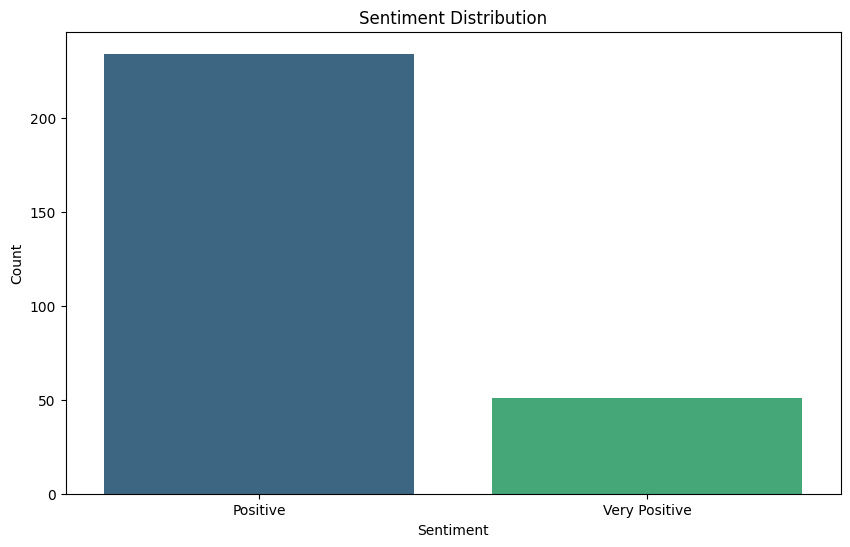

In [41]:
plt.figure(figsize=(10, 6))
sns.countplot(data=pdf, x='sentiment', palette='viridis')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

This bar chart represents the distribution of sentiments among customer reviews for the iPhone 15.

- **Positive** reviews are the majority.
- **Very Positive** reviews are significantly fewer.

The analysis suggests that while most users are satisfied, only a smaller portion express extreme positivity.

## Review Length vs Sentiment

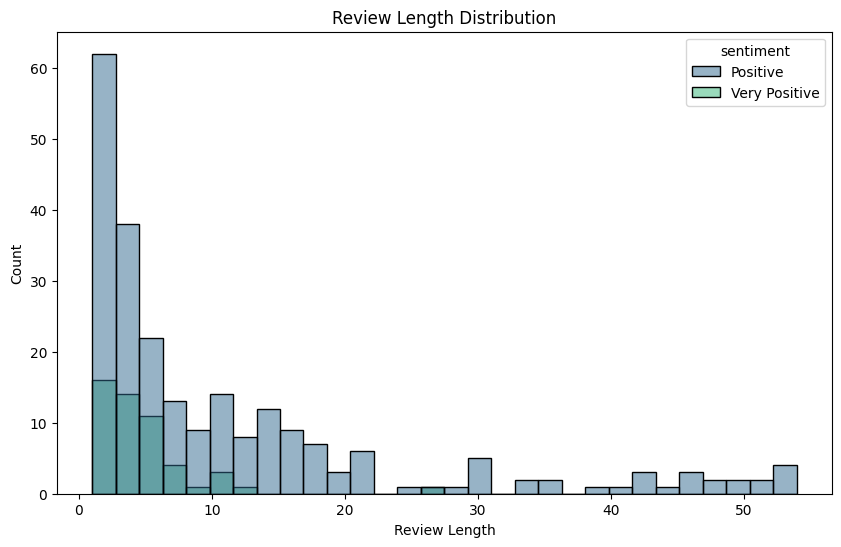

In [45]:
pdf['review_length'] = pdf['cleaned_review'].apply(lambda text: len(text.split()))

plt.figure(figsize=(10, 6))
sns.histplot(data=pdf, x='review_length', bins=30, palette='viridis', hue='sentiment')
plt.title("Review Length Distribution")
plt.xlabel("Review Length")
plt.ylabel("Count")
plt.show()

- **Shorter reviews** are more common, with the highest frequency near very short lengths.
- **Positive** reviews dominate the dataset.
- **Very Positive** reviews tend to be slightly longer but still follow a similar pattern.

This suggests that most customers express their opinions concisely.

## Ratings vs Avg Polarity

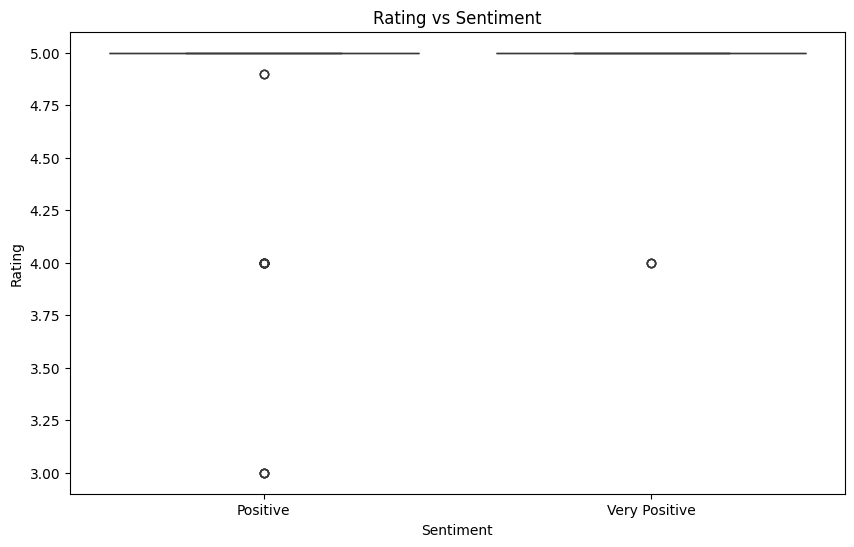

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=pdf, x='sentiment', y='rating', palette='viridis', hue='sentiment')
plt.title("Rating vs Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Rating")
plt.show()

- **Positive Sentiment**: Ratings mostly range from **3 to 5**, with a concentration around 5.
- **Very Positive Sentiment**: Ratings are almost entirely **4 and 5**, indicating stronger satisfaction.

This suggests that "Very Positive" reviews are strongly associated with higher ratings, while "Positive" reviews have a slightly broader range.

# Sentiment Analysis Report

## Overview
This report provides insights into customer sentiment based on review length and rating distributions. The dataset categorizes sentiment into "Positive" and "Very Positive" to analyze their characteristics.

## 1. Review Length Distribution

### Key Observations:
- Most reviews are short, with a high concentration between **1-10 words**.
- "Very Positive" reviews tend to be slightly longer than "Positive" reviews.
- The frequency of reviews decreases as length increases, following a right-skewed distribution.

## 2. Rating vs Sentiment

### Key Observations:
- "Very Positive" reviews are highly concentrated around **ratings of 5**, with occasional 4s.
- "Positive" reviews show a broader distribution, including **ratings of 3, 4, and 5**.
- There is a clear distinction: **higher ratings are strongly correlated with "Very Positive" sentiment**.

## Conclusion
- Customers who leave **shorter reviews** are more frequent, but the length does not necessarily correlate with higher ratings.
- **Very Positive sentiment aligns closely with a 5-star rating**, whereas "Positive" sentiment has some variability.
- Businesses can use this analysis to better understand customer sentiment and improve services accordingly.

## Recommendations
- Encourage customers to leave detailed feedback to gain deeper insights.
- Identify the factors driving "Positive" but not "Very Positive" ratings to improve customer satisfaction.